### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing as prepr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error, r2_score

### Import dataset and do necessary changes 

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
print('Shape:{}'.format(df.shape))
print(df.head(10))
print(df.describe())
df.columns = [x.replace(' ', '').replace('.', '').lower() for x in list(df)] #converts columnnames to lower single words
del df['serialno']

Shape:(500, 9)
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   
5           6        330          115                  5  4.5   3.0  9.34   
6           7        321          109                  3  3.0   4.0  8.20   
7           8        308          101                  2  3.0   4.0  7.90   
8           9        302          102                  1  2.0   1.5  8.00   
9          10        323          108                  3  3.5   3.0  8.60   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3        

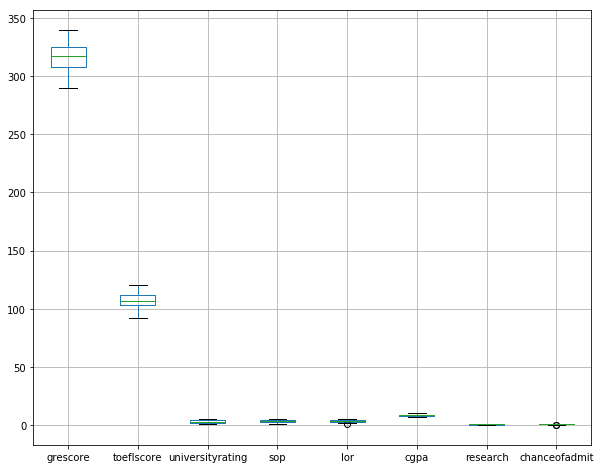

In [3]:
df.boxplot(showbox=True, figsize=(10,8))

### Standardizing the entire dataset using Min-Max scaling

In [4]:
cols = list(df)
scaler = prepr.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
print(scaled_df.head(10))
print(scaled_df.describe())

   grescore  toeflscore  universityrating    sop    lor      cgpa  research  \
0      0.94    0.928571              0.75  0.875  0.875  0.913462       1.0   
1      0.68    0.535714              0.75  0.750  0.875  0.663462       1.0   
2      0.52    0.428571              0.50  0.500  0.625  0.384615       1.0   
3      0.64    0.642857              0.50  0.625  0.375  0.599359       1.0   
4      0.48    0.392857              0.25  0.250  0.500  0.451923       0.0   
5      0.80    0.821429              1.00  0.875  0.500  0.814103       1.0   
6      0.62    0.607143              0.50  0.500  0.750  0.448718       1.0   
7      0.36    0.321429              0.25  0.500  0.750  0.352564       0.0   
8      0.24    0.357143              0.00  0.250  0.125  0.384615       0.0   
9      0.66    0.571429              0.50  0.625  0.500  0.576923       0.0   

   chanceofadmit  
0       0.920635  
1       0.666667  
2       0.603175  
3       0.730159  
4       0.492063  
5       0.888889

/Users/payalgupta/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Pairplot

This is a scatter plot of all the attributes on both x and y axes. 'chanceofadmit' is the dependent variable and the plot clearly shows that there are few attributes that have a linear relation with the dependent attribute. So we can move ahead with linear regression.

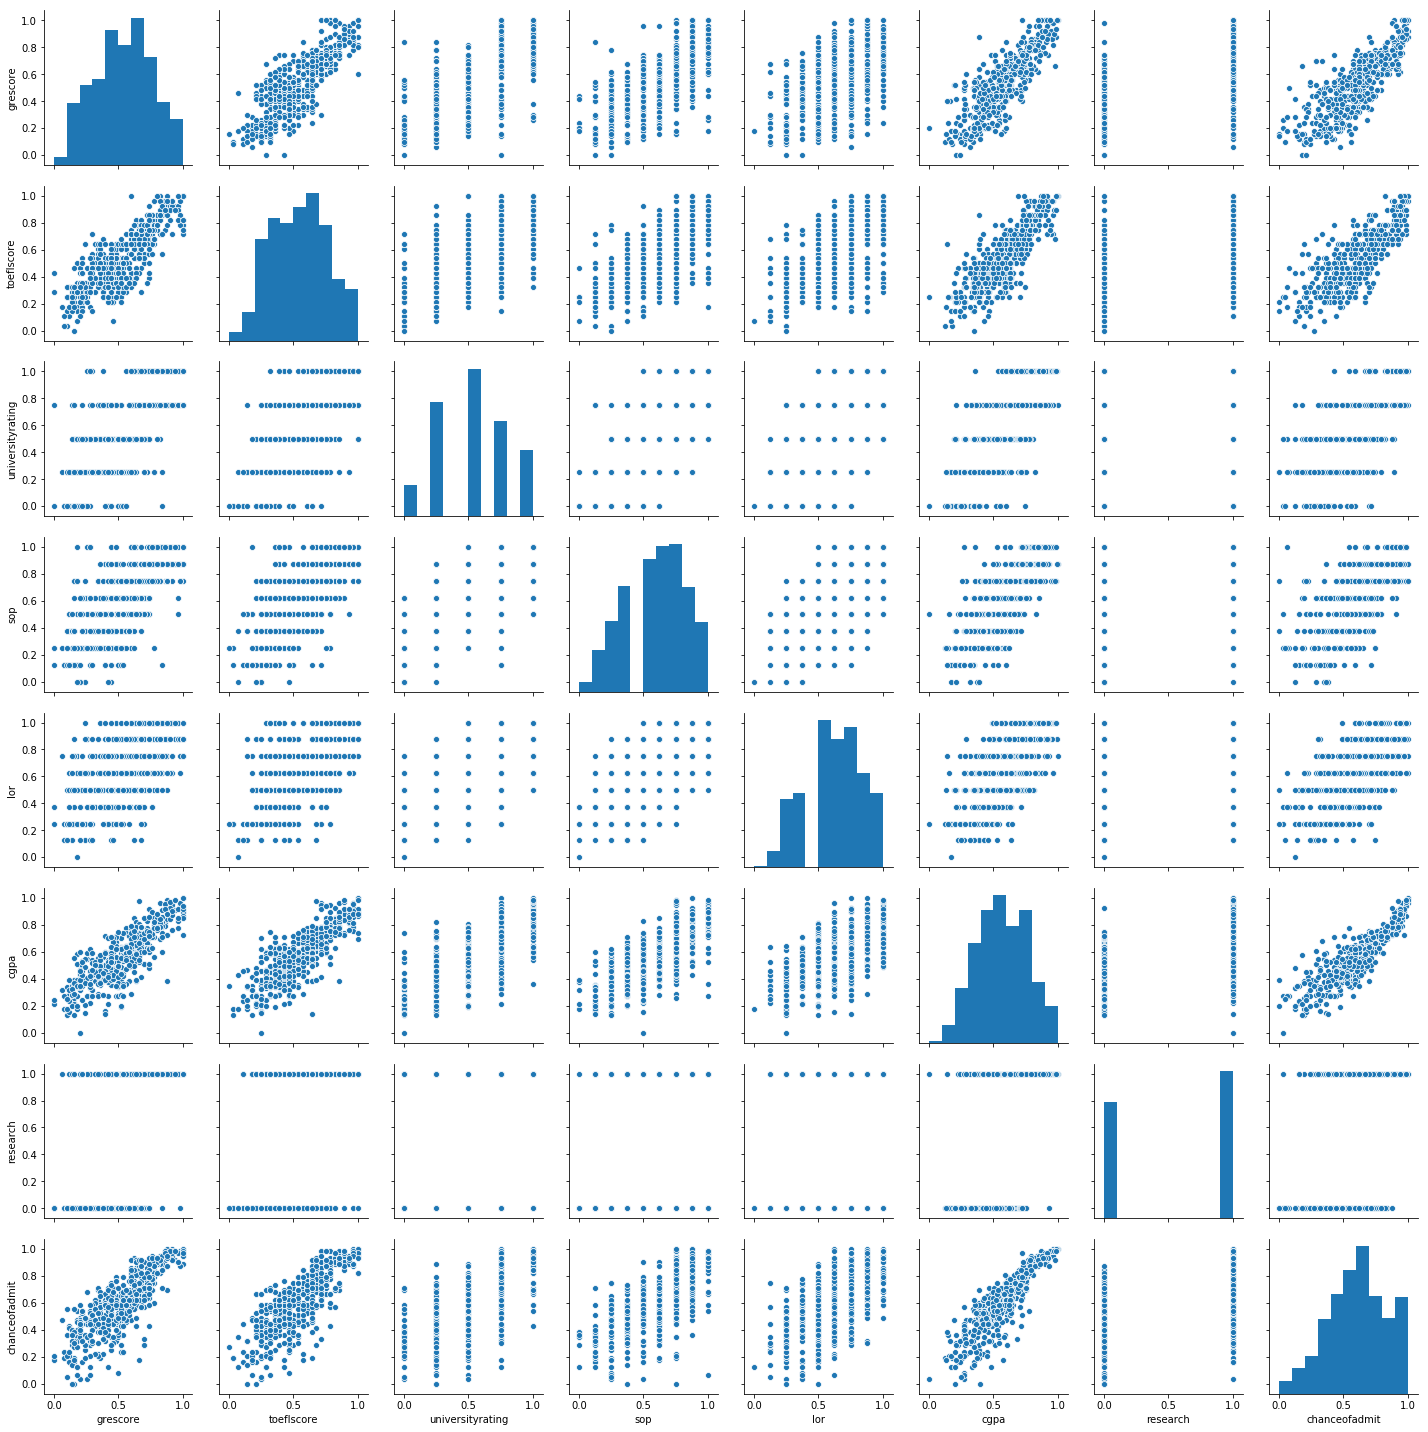

In [5]:
sns.pairplot(scaled_df)

#### Creating X and Y for the linear regression equation (Y = a  + $βX_{1}$ + $βX_{2}$ + ... + $βX_{n}$) where Y is the dependent variable and Xs are the independent variables

In [6]:
cols = list(scaled_df)
X = scaled_df.iloc[:, :-1]
y = scaled_df[cols[-1]]

### Using statsmodels provided Linear Regression Model

OLS is the function used to create a linear model. This model defines the linear regression formula as 
Y = $aX_{0}$ + $βX_{1}$ + $βX_{2}$ + ... + $βX_{n}$.

So create a new attribute with all ones and append it to the start of the dataframe. This will serve as $X_{0}$

In [7]:
X = np.append(arr=np.ones([len(scaled_df.index), 1]).astype(int), values=X, axis=1)
options = X[:, [0, 1, 2, 3, 4, 5, 6, 7]]
lm_be = sm.OLS(endog=y, exog=options).fit()
print(lm_be.summary())

                            OLS Regression Results                            
Dep. Variable:          chanceofadmit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          8.21e-180
Time:                        14:59:17   Log-Likelihood:                 470.37
No. Observations:                 500   AIC:                            -924.7
Df Residuals:                     492   BIC:                            -891.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0130      0.014      0.902      0.3

In [9]:
# Remove attribute 4 (sop) as it has the highest p-value and rewrite the formula
options= X[:, [0, 1, 2, 3, 5, 6, 7]]
lm_be = sm.OLS(endog=y, exog=options).fit()
lm_be.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          chanceofadmit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     379.1
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          4.29e-181
Time:                        14:59:23   Log-Likelihood:                 470.31
No. Observations:                 500   AIC:                            -926.6
Df Residuals:                     493   BIC:                            -897.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0135      0.014      0.935      0.350      -0.015       0.042
x1             0.1471      0.040      3.694      0.000       0.069       0.225
x2             0.1248      0.039      3.236      0.001       0.049       0.201
x3             0.0408      0.022      1.820      0.069      -0.003       0.085
x4             0.1098      0.025      4.380      0.000       0.061       0.159
x5             0.5893      0.047     12.481      0.000       0.497       0.682
x6             0.0387      0.010      3.691      0.000       0.018       0.059
==============================================================================
Omnibus:                      111.782   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.656
Skew:                          -1.152   Prob(JB):                     6.82e-57
Kurtosis:                       5.667   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Remove attribute 3 (universityrating) as it has the highest p-value and rewrite the formula
options = X[:, [0, 1, 2, 5, 6, 7]]
lm_be = sm.OLS(endog=y, exog=options).fit()
lm_be.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          chanceofadmit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     452.1
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          9.97e-182
Time:                        14:59:26   Log-Likelihood:                 468.63
No. Observations:                 500   AIC:                            -925.3
Df Residuals:                     494   BIC:                            -900.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0085      0.014      0.598      0.550      -0.019       0.036
x1             0.1499      0.040      3.760      0.000       0.072       0.228
x2             0.1341      0.038      3.501      0.001       0.059       0.209
x3             0.1227      0.024      5.092      0.000       0.075       0.170
x4             0.6090      0.046     13.221      0.000       0.519       0.700
x5             0.0399      0.010      3.814      0.000       0.019       0.061
==============================================================================
Omnibus:                      109.027   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.874
Skew:                          -1.130   Prob(JB):                     9.07e-55
Kurtosis:                       5.615   Cond. No.                         20.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Create train and test set from the attributes that are not eliminated by backward elimination

In [11]:
X_train, X_test, y_train, y_test = train_test_split(options, y, test_size=0.2, random_state=123)

### Create a regular Linear Regression model 

In [ ]:
lm = LinearRegression().fit(X_train, y_train)

### Predicting

In [12]:
#Predict
y_pred = lm.predict(X_test)

### Display Result

In [13]:
final_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(final_df.head(10))

       Actual  Predicted
229  0.761905   0.740063
337  0.952381   0.941972
327  0.555556   0.301407
416  0.492063   0.446706
306  0.714286   0.761012
131  0.682540   0.563316
5    0.888889   0.844722
431  0.619048   0.699565
434  0.476190   0.442705
134  0.873016   0.858961


### Calculate accuracy

In [14]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.01
Variance score: 0.78
